In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
n_samples = 100

In [3]:
X = np.random.normal(size=(n_samples, 3))
X[:, 0] += 0.5 * X[:, 1]

In [4]:
Y = np.random.normal(size=(n_samples, 2))
Y[:, 1] += 0.7 * Y[:, 0]

In [5]:
X_df = pd.DataFrame(X, columns=["X1", "X2", "X3"])
Y_df = pd.DataFrame(Y, columns=["Y1", "Y2"])

In [6]:
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

In [7]:
X_std = scaler_X.fit_transform(X)
Y_std = scaler_Y.fit_transform(Y)

In [8]:
n_components = min(X_std.shape[1], Y_std.shape[1])
cca = CCA(n_components=n_components)
X_c, Y_c = cca.fit_transform(X_std, Y_std)

In [9]:
canonical_corrs = np.corrcoef(X_c.T, Y_c.T).diagonal(offset=n_components)
print("Canonical Correlations:")
print(canonical_corrs)

Canonical Correlations:
[0.15889055 0.12168132]


In [10]:
loadings_X = np.dot(scaler_X.scale_ * cca.x_weights_.T, np.cov(X_std.T))
loadings_Y = np.dot(scaler_Y.scale_ * cca.y_weights_.T, np.cov(Y_std.T))

In [11]:
print("\nCanonical Loadings for X:")
print(pd.DataFrame(loadings_X, columns=X_df.columns))

print("\nCanonical Loadings for Y:")
print(pd.DataFrame(loadings_Y, columns=Y_df.columns))


Canonical Loadings for X:
         X1        X2        X3
0  0.409971  0.201050  0.816401
1  0.989708  0.857074 -0.760357

Canonical Loadings for Y:
         Y1        Y2
0 -0.353912 -0.881312
1 -1.259661 -1.068251


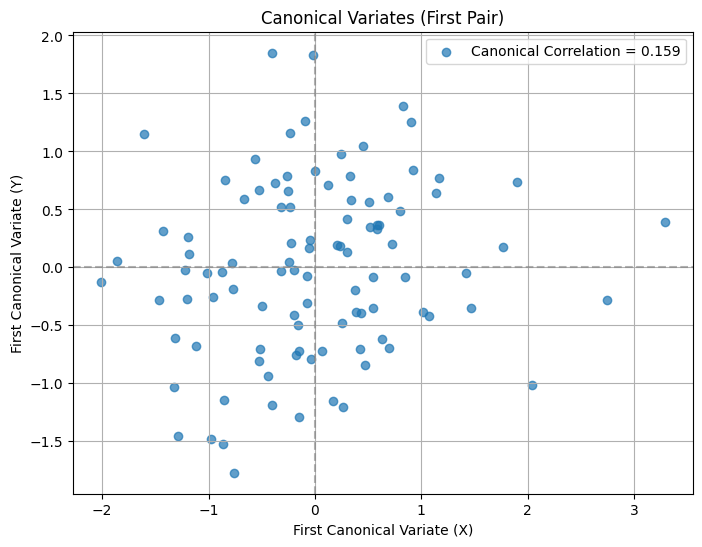

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X_c[:, 0], Y_c[:, 0], alpha=0.7, label=f"Canonical Correlation = {canonical_corrs[0]:.3f}")
plt.axhline(0, color='gray', linestyle='--', alpha=0.6)
plt.axvline(0, color='gray', linestyle='--', alpha=0.6)
plt.title("Canonical Variates (First Pair)")
plt.xlabel("First Canonical Variate (X)")
plt.ylabel("First Canonical Variate (Y)")
plt.legend()
plt.grid()
plt.show()